In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import spatial
import math
from numpy import linalg as LA

In [11]:
train=pd.read_csv('f:/ml_d2train.csv',usecols=[1,2,3])
test=pd.read_csv('f:/ml_d2test.csv',usecols=[1,2,3])

In [12]:
train.head()

,userId,movieId,rating
0,3989,186,2
1,4328,170,1
2,3333,2598,4
3,3550,1289,5
4,1019,3475,2


In [13]:
train.describe()

,userId,movieId,rating
count,472801.000000,472801.000000,472801.000000
mean,3035.887604,1839.650170,3.590663
std,1727.634976,1081.972551,1.098759
min,2.000000,1.000000,1.000000
25%,1516.000000,1029.000000,3.000000
50%,3108.000000,1777.000000,4.000000
75%,4480.000000,2724.000000,4.000000
max,6040.000000,3952.000000,5.000000


In [14]:
no_movies=max(train['movieId'])+1
no_users=max(train['userId'])+1

In [15]:
rated= [set() for i in range(no_movies) ]
userrated=[[] for i in range(no_users) ]
dictionary={}

In [16]:
deviation=np.zeros(no_movies*no_movies).reshape(no_movies,no_movies)
cardinality=np.zeros(no_movies*no_movies).reshape(no_movies,no_movies)
jaccard=np.zeros(no_movies*no_movies).reshape(no_movies,no_movies)


In [17]:
user_mean=np.zeros(shape=[no_users,3])

In [18]:
for ind,i in enumerate(train.itertuples(),1):
    usr=int(i.userId)
    mov=int(i.movieId)
    rate=(i.rating)
    
    rated[mov].add(usr)
    userrated[usr].append(mov)
    dictionary[(usr,mov)]=rate
    user_mean[usr][0]+=1
    user_mean[usr][1]+=i.rating

In [19]:
for x in user_mean:
    x[2]=round(x[1]/x[0],2)
    
for x in user_mean:
    if math.isnan(x[2]):
        x[2]=0


In [20]:
mv=train['movieId'].unique()


In [21]:
import time

In [22]:
t1=time.time()
for i in range(no_movies):
    for j in range(i+1,no_movies):
        if i in mv and j in mv:
            tmprate = list(rated[i].intersection(rated[j]))
            x1=np.array([dictionary[(uid,j)]-user_mean[uid][2] for uid in tmprate])      
            x2=np.array([ dictionary[(uid,i)]-user_mean[uid][2] for uid in tmprate])
            arr=np.array([(dictionary[(uid,j)]-dictionary[(uid,i)])  for uid in tmprate])
            uoutput=sum(arr)
            c=len(arr)
            deviation[i][j]=uoutput
            deviation[j][i]=-uoutput
            cardinality[i][j]=c
            cardinality[j][i]=c
            if len(x1) !=0 and len(x2)!=0:
                v1=LA.norm(x1)
                v2=LA.norm(x2)
                v3=np.dot(x1,x2)
                jaccard[i][j]=(v3/(v1*v2))
            jaccard[j][i]=jaccard[i][j]
print(time.time()-t1)   

956.6008822917938


In [23]:
test.head()

,userId,movieId,rating
0,224,953,2
1,2810,1035,5
2,3841,2365,3
3,5676,186,1
4,1597,223,2


In [24]:
import math

In [25]:
test.describe()

,userId,movieId,rating
count,313172.00000,313172.000000,313172.000000
mean,3035.74180,1839.428145,3.589992
std,1727.42927,1080.493807,1.099634
min,2.00000,1.000000,1.000000
25%,1516.00000,1030.000000,3.000000
50%,3108.00000,1777.000000,4.000000
75%,4480.00000,2722.000000,4.000000
max,6040.00000,3952.000000,5.000000


In [26]:
d2=np.asarray(test)

KNN Based Approach

In [27]:
t1=time.time()
K=[i for i in range(1,101) ]
thres1=55
thres2=40
thres3=25
thres4=10
thres5=1
rmse1=[0 for i in range(1,101)]
mae1=[0 for i in range(1,101)]
rmse2=[0 for i in range(1,101)]
mae2=[0 for i in range(1,101)]
rmse3=[0 for i in range(1,101)]
mae3=[0 for i in range(1,101)]
rmse4=[0 for i in range(1,101)]
mae4=[0 for i in range(1,101)]
rmse5=[0 for i in range(1,101)]
mae5=[0 for i in range(1,101)]
gim1=[0 for i in range(1,101)]
gpim1=[0 for i in range(1,101)]
gim2=[0 for i in range(1,101)]
gpim2=[0 for i in range(1,101)]
gim3=[0 for i in range(1,101)]
gpim3=[0 for i in range(1,101)]
gim4=[0 for i in range(1,101)]
gpim4=[0 for i in range(1,101)]
gim5=[0 for i in range(1,101)]
gpim5=[0 for i in range(1,101)]
c_gim1=[0 for i in range(1,101)]
c_gpim1=[0 for i in range(1,101)]
c_gim2=[0 for i in range(1,101)]
c_gpim2=[0 for i in range(1,101)]
c_gim3=[0 for i in range(1,101)]
c_gpim3=[0 for i in range(1,101)]
c_gim4=[0 for i in range(1,101)]
c_gpim4=[0 for i in range(1,101)]
c_gim5=[0 for i in range(1,101)]
c_gpim5=[0 for i in range(1,101)]
tp1=[0 for i in range(1,101)]
fp1=[0 for i in range(1,101)]
tn1=[0 for i in range(1,101)]
fn1=[0 for i in range(1,101)]
tp2=[0 for i in range(1,101)]
fp2=[0 for i in range(1,101)]
tn2=[0 for i in range(1,101)]
fn2=[0 for i in range(1,101)]
tp3=[0 for i in range(1,101)]
fp3=[0 for i in range(1,101)]
tn3=[0 for i in range(1,101)]
fn3=[0 for i in range(1,101)]
tp4=[0 for i in range(1,101)]
fp4=[0 for i in range(1,101)]
tn4=[0 for i in range(1,101)]
fn4=[0 for i in range(1,101)]
tp5=[0 for i in range(1,101)]
fp5=[0 for i in range(1,101)]
tn5=[0 for i in range(1,101)]
fn5=[0 for i in range(1,101)]


for i in range(d2.shape[0]):
    usr=int(d2[i][0])
    mov=int(d2[i][1])
    actual=d2[i][2]
    predicted1=0
    predicted2=0
    predicted3=0
    predicted4=0
    predicted5=0
    list_of_all_movies_rate_by_the_current_user=np.array(userrated[usr])
    
    dev_arr1=np.array([(deviation[k][mov]/ cardinality[k][mov]) for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres1])
    
    corres_rate1=np.array([dictionary[(usr,k)]  for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres1])
    j_arr1=np.array([jaccard[k][mov] for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres1])
    dev_arr2=np.array([(deviation[k][mov]/ cardinality[k][mov]) for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres2])
    
    corres_rate2=np.array([dictionary[(usr,k)]  for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres2])
    j_arr2=np.array([jaccard[k][mov] for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres2])
    dev_arr3=np.array([(deviation[k][mov]/ cardinality[k][mov]) for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres3])
    
    corres_rate3=np.array([dictionary[(usr,k)]  for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres3])
    j_arr3=np.array([jaccard[k][mov] for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres3])
    dev_arr4=np.array([(deviation[k][mov]/ cardinality[k][mov]) for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres4])
    
    corres_rate4=np.array([dictionary[(usr,k)]  for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres4])
    j_arr4=np.array([jaccard[k][mov] for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres4])
    dev_arr5=np.array([(deviation[k][mov]/ cardinality[k][mov]) for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres5])
    
    corres_rate5=np.array([dictionary[(usr,k)]  for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres5])
    j_arr5=np.array([jaccard[k][mov] for k in list_of_all_movies_rate_by_the_current_user 
             if cardinality[k][mov]>=thres5])
        
    #choosing top k
    in1=j_arr1.argsort()[::-1]
    new_rate1=corres_rate1[in1]
    new_dev1=dev_arr1[in1]
    
    in2=j_arr2.argsort()[::-1]
    new_rate2=corres_rate2[in2]
    new_dev2=dev_arr2[in2]
    
    in3=j_arr3.argsort()[::-1]
    new_rate3=corres_rate3[in3]
    new_dev3=dev_arr3[in3]
    
    in4=j_arr4.argsort()[::-1]
    new_rate4=corres_rate4[in4]
    new_dev4=dev_arr4[in4]
    
    in5=j_arr5.argsort()[::-1]
    new_rate5=corres_rate5[in5]
    new_dev5=dev_arr5[in5]
    
    #not necessary
    #j_arr.sort(reverse=True)
    
    
    for k in K:
        
        n_r1=new_rate1[:k]
        dev_1=new_dev1[:k] 
        n_r2=new_rate2[:k]
        dev_2=new_dev2[:k]
        n_r3=new_rate3[:k]
        dev_3=new_dev3[:k]
        n_r4=new_rate4[:k]
        dev_4=new_dev4[:k]
        n_r5=new_rate5[:k]
        dev_5=new_dev5[:k]
        
        length1=len(dev_1)
        length2=len(dev_2)
        length3=len(dev_3)
        length4=len(dev_4)
        length5=len(dev_5)

    
        #rating prediction
        rating1=sum(dev_1)+sum(n_r1)
        rating2=sum(dev_2)+sum(n_r2)
        rating3=sum(dev_3)+sum(n_r3)
        rating4=sum(dev_4)+sum(n_r4)
        rating5=sum(dev_5)+sum(n_r5)
        
        if length1!=0:
            predicted1=(rating1/length1)
        else:
            predicted1=0
    
        if predicted1>5:
            predicted1=5
        
        if predicted1 <0:
            predicted1=0
        
        
        if length2!=0:
            predicted2=(rating2/length2)
        else:
            predicted2=0
    
        if predicted2>5:
            predicted2=5
        
        if predicted2 <0:
            predicted2=0
            
        if length3!=0:
            predicted3=(rating3/length3)
        else:
            predicted3=0
    
        if predicted3>5:
            predicted3=5
        
        if predicted3 <0:
            predicted3=0
            
        if length4!=0:
            predicted4=(rating4/length4)
        else:
            predicted4=0
    
        if predicted4>5:
            predicted4=5
        
        if predicted4 <0:
            predicted4=0
            
        if length5!=0:
            predicted5=(rating5/length5)
        else:
            predicted5=0
    
        if predicted5>5:
            predicted5=5
        
        if predicted5 <0:
            predicted5=0
            
        if actual >=3:
            gim1[k-1]+=abs(actual-predicted1)
            c_gim1[k-1]+=1
        if predicted1 >=3:
            gpim1[k-1]+=abs(actual-predicted1)
            c_gpim1[k-1]+=1
        if actual >=3:
            gim2[k-1]+=abs(actual-predicted2)
            c_gim2[k-1]+=1
        if predicted2 >=3:
            gpim2[k-1]+=abs(actual-predicted2)
            c_gpim2[k-1]+=1
        if actual >=3:
            gim3[k-1]+=abs(actual-predicted3)
            c_gim3[k-1]+=1
        if predicted3 >=3:
            gpim3[k-1]+=abs(actual-predicted3)
            c_gpim3[k-1]+=1
        if actual >=3:
            gim4[k-1]+=abs(actual-predicted4)
            c_gim4[k-1]+=1
        if predicted4 >=3:
            gpim4[k-1]+=abs(actual-predicted4)
            c_gpim4[k-1]+=1
        if actual >=3:
            gim5[k-1]+=abs(actual-predicted5)
            c_gim5[k-1]+=1
        if predicted5 >=3:
            gpim5[k-1]+=abs(actual-predicted5)
            c_gpim5[k-1]+=1
    
        if actual>=3 and predicted1>=3:
            tp1[k-1]+=1
        elif actual<3 and predicted1>=3:
            fp1[k-1]+=1
        elif actual>=3 and predicted1<3:
            fn1[k-1]+=1
        elif  actual<3 and predicted1<3:
            tn1[k-1]+=1
        
        
        if actual>=3 and predicted2>=3:
            tp2[k-1]+=1
        elif actual<3 and predicted2>=3:
            fp2[k-1]+=1
        elif actual>=3 and predicted2<3:
            fn2[k-1]+=1
        elif  actual<3 and predicted2<3:
            tn2[k-1]+=1
        
        
        if actual>=3 and predicted3>=3:
            tp3[k-1]+=1
        elif actual<3 and predicted3>=3:
            fp3[k-1]+=1
        elif actual>=3 and predicted3<3:
            fn3[k-1]+=1
        elif  actual<3 and predicted3<3:
            tn3[k-1]+=1
            
        
        if actual>=3 and predicted4>=3:
            tp4[k-1]+=1
        elif actual<3 and predicted4>=3:
            fp4[k-1]+=1
        elif actual>=3 and predicted4<3:
            fn4[k-1]+=1
        elif  actual<3 and predicted4<3:
            tn4[k-1]+=1
            
        
        if actual>=3 and predicted5>=3:
            tp5[k-1]+=1
        elif actual<3 and predicted5>=3:
            fp5[k-1]+=1
        elif actual>=3 and predicted5<3:
            fn5[k-1]+=1
        elif  actual<3 and predicted5<3:
            tn5[k-1]+=1
        
        rmse1[k-1]+=((actual-predicted1)**2)
        mae1[k-1]+=abs(actual-predicted1)
        rmse2[k-1]+=((actual-predicted2)**2)
        mae2[k-1]+=abs(actual-predicted2)
        rmse3[k-1]+=((actual-predicted3)**2)
        mae3[k-1]+=abs(actual-predicted3)
        rmse4[k-1]+=((actual-predicted4)**2)
        mae4[k-1]+=abs(actual-predicted4)
        rmse5[k-1]+=((actual-predicted5)**2)
        mae5[k-1]+=abs(actual-predicted5)

print(time.time()-t1)

9335.757680416107


In [28]:
index=d2.shape[0]

In [29]:
index

313172

In [30]:
new_rmse1=[math.sqrt(i/index) for i in rmse1]
new_rmse2=[math.sqrt(i/index) for i in rmse2]
new_rmse3=[math.sqrt(i/index) for i in rmse3]
new_rmse4=[math.sqrt(i/index) for i in rmse4]
new_rmse5=[math.sqrt(i/index) for i in rmse5]

In [31]:
new_mae1=[i/index for i in mae1]
new_mae2=[i/index for i in mae2]
new_mae3=[i/index for i in mae3]
new_mae4=[i/index for i in mae4]
new_mae5=[i/index for i in mae5]

In [32]:
new_gim1=[i/j for i,j in zip(gim1,c_gim1)]
new_gim2=[i/j for i,j in zip(gim2,c_gim2)]
new_gim3=[i/j for i,j in zip(gim3,c_gim3)]
new_gim4=[i/j for i,j in zip(gim4,c_gim4)]
new_gim5=[i/j for i,j in zip(gim5,c_gim5)]

In [33]:
new_gpim1=[i/j for i,j in zip(gpim1,c_gpim1)]
new_gpim2=[i/j for i,j in zip(gpim2,c_gpim2)]
new_gpim3=[i/j for i,j in zip(gpim3,c_gpim3)]
new_gpim4=[i/j for i,j in zip(gpim4,c_gpim4)]
new_gpim5=[i/j for i,j in zip(gpim5,c_gpim5)]

In [34]:
pre1=[i/(i+k) for i,k in zip(tp1,fp1)]
pre2=[i/(i+k) for i,k in zip(tp2,fp2)]
pre3=[i/(i+k) for i,k in zip(tp3,fp3)]
pre4=[i/(i+k) for i,k in zip(tp4,fp4)]
pre5=[i/(i+k) for i,k in zip(tp5,fp5)]

In [35]:
re1=[i/(i+k) for i,k in zip(tp1,fn1)]
re2=[i/(i+k) for i,k in zip(tp2,fn2)]
re3=[i/(i+k) for i,k in zip(tp3,fn3)]
re4=[i/(i+k) for i,k in zip(tp4,fn4)]
re5=[i/(i+k) for i,k in zip(tp5,fn5)]

In [36]:
min(new_rmse1)

1.18981871781542

In [37]:
min(new_mae1)

0.83787902039433182

In [38]:
min(new_rmse2)

0.9442004201533039

In [39]:
min(new_mae2)

0.71536728738902911

In [40]:
min(new_rmse3)

0.8672462625690144

In [41]:
min(new_mae3)

0.68070507230801669

In [42]:
min(new_rmse4)

0.8668862989236608

In [43]:
min(new_mae4)

0.68081040701989559

In [44]:
min(new_rmse5)

0.8693330841167869

In [45]:
min(new_mae5)

0.6833762625390899

In [46]:
min(new_gim1)

0.75238880907063599

In [47]:
min(new_gim2)

0.61777464588964615

In [48]:
min(new_gim3)

0.58091494836917024

In [49]:
min(new_gim4)

0.58046610635707185

In [50]:
min(new_gim5)

0.58169075866862452

In [51]:
min(new_gpim1)

0.66823767550687874

In [52]:
min(new_gpim2)

0.66679155730243878

In [53]:
min(new_gpim3)

0.66377469977098569

In [54]:
min(new_gpim4)

0.664446112427862

In [55]:
min(new_gpim5)

0.66614047836466217

In [56]:
max(pre1)

0.9159896138705084

In [57]:
max(pre2)

0.9156233860345193

In [58]:
max(pre3)

0.9165974905015805

In [59]:
max(pre4)

0.916014297480349

In [60]:
max(pre5)

0.9145825772756678

In [61]:
max(re1)

0.8507300197630707

In [62]:
max(re2)

0.8837354859022164

In [63]:
max(re3)

0.8941101497213825

In [64]:
max(re4)

0.8961737025980282

In [65]:
max(re5)

0.896048523838967

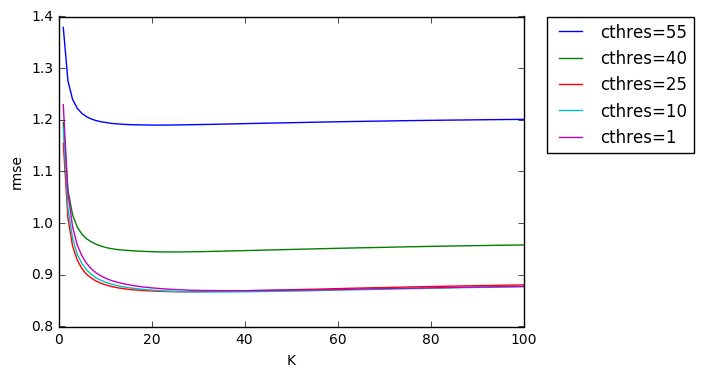

In [87]:
plt.plot(K,new_rmse1,label="cthres=55")
plt.plot(K,new_rmse2,label="cthres=40")
plt.plot(K,new_rmse3,label="cthres=25")
plt.plot(K,new_rmse4,label="cthres=10")
plt.plot(K,new_rmse5,label="cthres=1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("rmse")

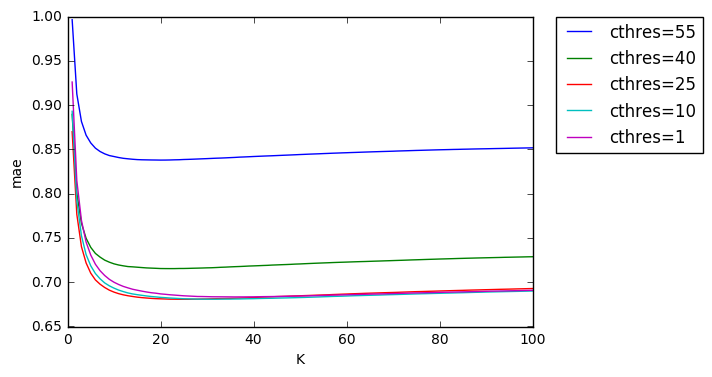

In [82]:
plt.plot(K,new_mae1,label="cthres=55")
plt.plot(K,new_mae2,label="cthres=40")
plt.plot(K,new_mae3,label="cthres=25")
plt.plot(K,new_mae4,label="cthres=10")
plt.plot(K,new_mae5,label="cthres=1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("mae")

thres= 100  K=10 rmse =1.563 K=4 mae=1.2229 
thres=50    K=11 rmse= 1.537 K=6 mae= 1.2078
thres=25    K=25 rmse= 1.530 K=5 mae= 1.2186
thres=15    K=31 rmse= 1.524 K=5 mae= 1.2246

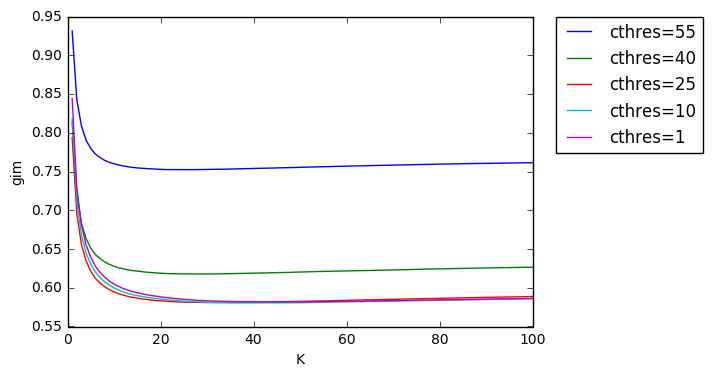

In [83]:
plt.plot(K,new_gim1,label="cthres=55")
plt.plot(K,new_gim2,label="cthres=40")
plt.plot(K,new_gim3,label="cthres=25")
plt.plot(K,new_gim4,label="cthres=10")
plt.plot(K,new_gim5,label="cthres=1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("gim")

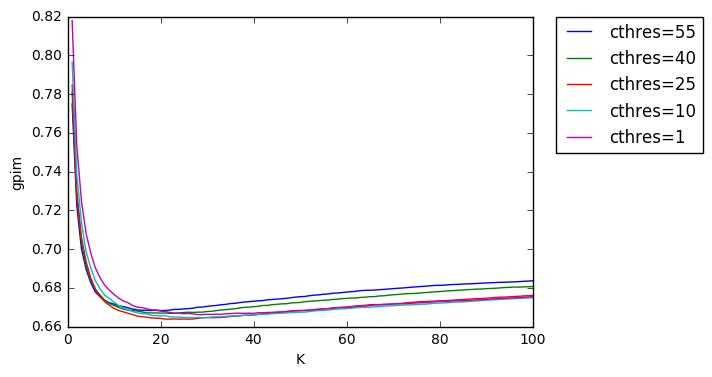

In [84]:
plt.plot(K,new_gpim1,label="cthres=55")
plt.plot(K,new_gpim2,label="cthres=40")
plt.plot(K,new_gpim3,label="cthres=25")
plt.plot(K,new_gpim4,label="cthres=10")
plt.plot(K,new_gpim5,label="cthres=1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("gpim")

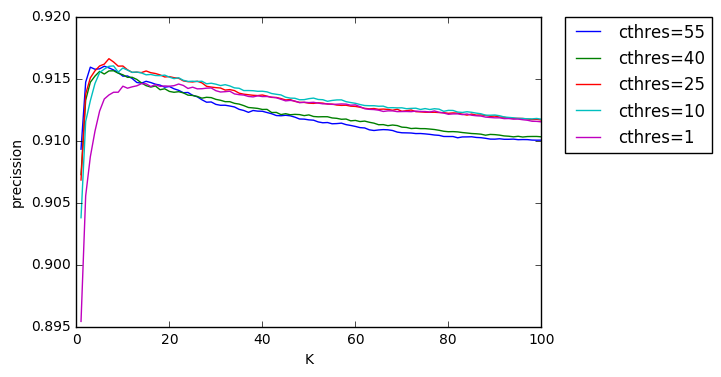

In [85]:
plt.plot(K,pre1,label="cthres=55")
plt.plot(K,pre2,label="cthres=40")
plt.plot(K,pre3,label="cthres=25")
plt.plot(K,pre4,label="cthres=10")
plt.plot(K,pre5,label="cthres=1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("precission")

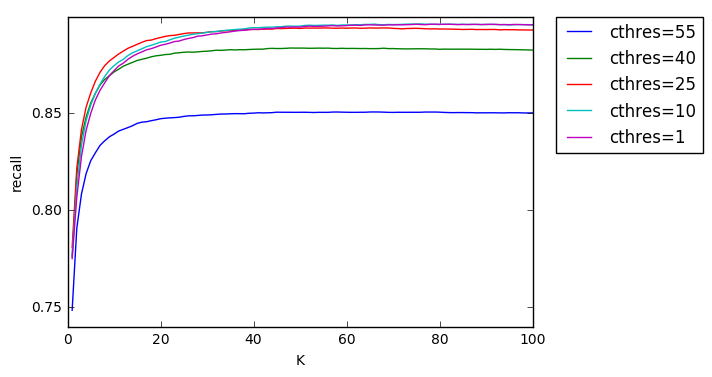

In [86]:
plt.plot(K,re1,label="cthres=55")
plt.plot(K,re2,label="cthres=40")
plt.plot(K,re3,label="cthres=25")
plt.plot(K,re4,label="cthres=10")
plt.plot(K,re5,label="cthres=1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("recall")

In [72]:
rmse_normal2=0
mae_normal2=0
gim=0
gpim=0
tp=0
fp=0
tn=0
fn=0
c_gim=0
c_gpim=0
for i, row in enumerate(test.itertuples(), 1):
    usr=int(row.userId)
    mov=int(row.movieId)
    actual=row.rating
    pred_normal2=0
    
    list_of_all_movies_rate_by_the_current_user=np.array(userrated[usr])
#     length=len(list_of_all_movies_rate_by_the_current_user)
    l1=[(deviation[j][mov]/ cardinality[j][mov]) for j in list_of_all_movies_rate_by_the_current_user 
                      if cardinality[j][mov]!=0]
    cnt=len(l1)
    pred_normal2+=sum([dictionary[(usr,j)] for j in list_of_all_movies_rate_by_the_current_user  if cardinality[j][mov]!=0])
    pred_normal2+=sum(l1)
    
#     list_of_all_movies_rate_by_the_current_user=train[train['userId']==usr]
#     length=list_of_all_movies_rate_by_the_current_user.shape[0]
#     cnt=0
#     for j,r2 in enumerate(list_of_all_movies_rate_by_the_current_user.itertuples(),1):
#         curmov=r2.movieId
#         currate=r2.rating
#         if cardinality[curmov][mov]!=0:
#             pred_normal2+=(currate+(deviation[curmov][mov]/ cardinality[curmov][mov]))
#             cnt+=1
    if cnt!=0:
        predicted_normal2=(pred_normal2/cnt)
    else:
        predicted_normal2=0
    if predicted_normal2>5:
        predicted_normal2=5
    if predicted_normal2 <0:
        predicted_normal2=0
    if actual >=3:
        gim+=abs(actual-predicted_normal2)
        c_gim+=1
    if predicted_normal2 >=3:
        gpim+=abs(actual-predicted_normal2)
        c_gpim+=1
    
    if actual>=3 and predicted_normal2>=3:
        tp+=1
    elif actual<3 and predicted_normal2>=3:
        fp+=1
    elif actual>=3 and predicted_normal2<3:
        fn+=1
    else:
        tn+=1
    #predicted_dict[usr].append(predicted_normal2)
    rmse_normal2+=((actual-predicted_normal2)**2)
    mae_normal2+=abs(actual-predicted_normal2)
    

In [73]:
number=test['userId'].count()

In [74]:
number

313172

In [75]:
print(mae_normal2/number)

0.705325244781


In [76]:
print(math.sqrt(rmse_normal2/number))

0.8942444265911246


In [77]:
gim/c_gim

0.59993749627245663

In [78]:
gpim/c_gpim

0.68889907930044048

In [79]:
tp/(tp+fp)

0.9101764086872445

In [80]:
tp/(tp+fn)

0.8891295524290369